## Импорт данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Репозиторий дыхания/0001_брюшное.tsv", names=['TimeStamp','Marker 1 to X', 'Marker 1 to Y', 'Marker 1 to Z', 'Marker 2 to X', 'Marker 2 to Y', 'Marker 2 to Z', 'Marker 3 to X', 'Marker 3 to Y', 'Marker 3 to Z', 'KVR'], sep=' ')
data.head()

,TimeStamp,Marker 1 to X,Marker 1 to Y,Marker 1 to Z,Marker 2 to X,Marker 2 to Y,Marker 2 to Z,Marker 3 to X,Marker 3 to Y,Marker 3 to Z,KVR
0,0.058895,0.689,-1.453,4.417,0.881,-1.544,4.547,0.718,-1.607,4.369,0.000079
1,0.111889,0.687,-1.452,4.418,0.881,-1.544,4.547,0.715,-1.607,4.371,0.000275
2,0.158371,0.687,-1.451,4.419,0.881,-1.544,4.545,0.714,-1.607,4.371,0.000170
3,0.262516,0.685,-1.450,4.420,0.882,-1.544,4.541,0.711,-1.608,4.373,0.000071
4,0.295620,0.684,-1.449,4.420,0.883,-1.544,4.540,0.709,-1.607,4.370,0.000064


## Анализ существующих данных

In [4]:
actors=pd.read_csv("Репозиторий дыхания/actors.txt", names=['id','date_of_birth','gender','covid','date_of_diagnosis','date_of_recovery','lung_lesions','percentage_of_lesions'], sep='\t')
actors = actors.drop_duplicates()
actors.head()

,id,date_of_birth,gender,covid,date_of_diagnosis,date_of_recovery,lung_lesions,percentage_of_lesions
0,1,04.07.2003,M,No,00.00.0000,00.00.0000,No,0
5,2,07.09.2001,M,No,00.00.0000,00.00.0000,No,0
9,3,14.04.2003,M,No,00.00.0000,00.00.0000,No,0
13,4,24.11.2003,M,Yes,05.11.2021,19.11.2021,No,0
17,5,29.03.2003,M,No,00.00.0000,00.00.0000,No,0


## Визуализация

In [ ]:
#Изменение маркеров в пространстве в проекции на плоскость

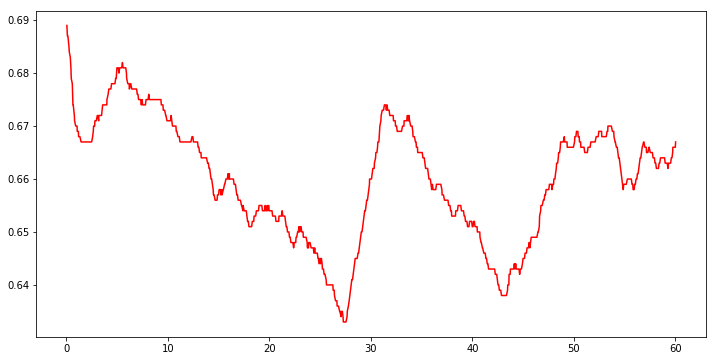

In [5]:
plt.figure(figsize=(12,6))
plt.plot(data['TimeStamp'], data['Marker 1 to X'], color='red')
plt.show()

In [6]:
#Получим максимальное значение в столбце 'Marker 1 to X' - амплитуду
maxX = data['Marker 1 to X'].max()
 
# выведем результат на экран
print(maxX)

0.6890000000000001


C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


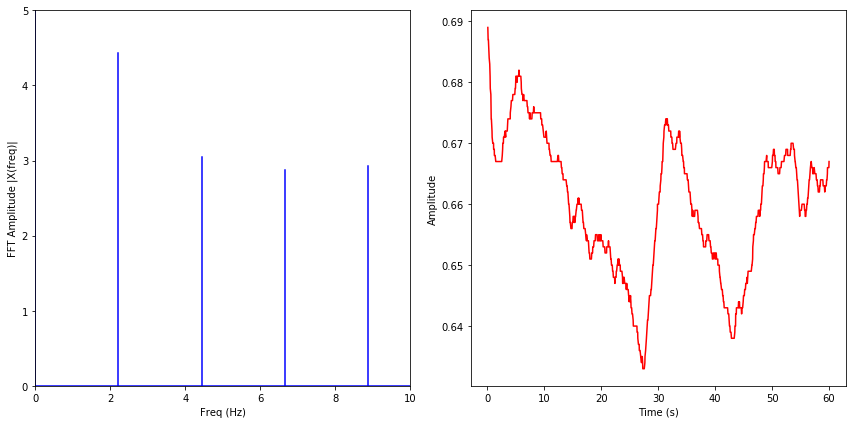

In [7]:
from numpy.fft import fft, ifft

x = data['Marker 1 to X']
t = data['TimeStamp']

X = fft(x)
N = len(X)
n = np.arange(N)
# sampling rate - Частота дискретизации
sr = 2000
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
plt.ylim(0, 5)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [63]:
# Делим actors по полу
men = actors[actors['gender']=='M']
women = actors[actors['gender']=='F']
# Получаем id мужчин и женщин
id_men = men['id']
id_women = women['id']

In [39]:
import os
path = 'Репозиторий дыхания'
dirs = os.listdir(path)
dirs

['0001_брюшное.tsv',
 '0001_грудное.tsv',
 '0001_обычное.tsv',
 '0001_смешанное.tsv',
 '0002_брюшное.tsv',
 '0002_грудное.tsv',
 '0002_обычное.tsv',
 '0002_смешанное.tsv',
 '0003_брюшное.tsv',
 '0003_грудное.tsv',
 '0003_обычное.tsv',
 '0003_смешанное.tsv',
 '0004_брюшное.tsv',
 '0004_грудное.tsv',
 '0004_обычное.tsv',
 '0004_смешанное.tsv',
 '0005_брюшное.tsv',
 '0005_грудное.tsv',
 '0005_обычное.tsv',
 '0005_смешанное.tsv',
 '0006_брюшное.tsv',
 '0006_грудное.tsv',
 '0006_обычное.tsv',
 '0006_смешанное.tsv',
 '0007_брюшное.tsv',
 '0007_грудное.tsv',
 '0007_обычное.tsv',
 '0007_смешанное.tsv',
 '0008_брюшное.tsv',
 '0008_грудное.tsv',
 '0008_обычное.tsv',
 '0008_смешанное.tsv',
 '0009_брюшное.tsv',
 '0009_грудное.tsv',
 '0009_обычное.tsv',
 '0009_смешанное.tsv',
 '0010_брюшное.tsv',
 '0010_грудное.tsv',
 '0010_обычное.tsv',
 '0010_смешанное.tsv',
 '0011_брюшное.tsv',
 '0011_грудное.tsv',
 '0011_обычное.tsv',
 '0011_смешанное.tsv',
 '0012_брюшное.tsv',
 '0012_грудное.tsv',
 '0012_обычн

In [40]:
import fnmatch, re
regex = fnmatch.translate('0007*')
regex

'(?s:0007.*)\\Z'

In [41]:
from pathlib import Path

def glob_re(path, regex="", glob_mask="**/*"):
    p = Path(path)
    res = [str(f) for f in p.glob(glob_mask) if re.search(regex, str(f))]
    return res

In [47]:
res = glob_re(path, regex)
res

['Репозиторий дыхания\\0007_брюшное.tsv',
 'Репозиторий дыхания\\0007_грудное.tsv',
 'Репозиторий дыхания\\0007_обычное.tsv',
 'Репозиторий дыхания\\0007_смешанное.tsv']

In [51]:
df = data=pd.read_csv(res[1], names=['TimeStamp','Marker 1 to X', 'Marker 1 to Y', 'Marker 1 to Z', 'Marker 2 to X', 'Marker 2 to Y', 'Marker 2 to Z', 'Marker 3 to X', 'Marker 3 to Y', 'Marker 3 to Z', 'KVR'], sep=' ')
df.head()

,TimeStamp,Marker 1 to X,Marker 1 to Y,Marker 1 to Z,Marker 2 to X,Marker 2 to Y,Marker 2 to Z,Marker 3 to X,Marker 3 to Y,Marker 3 to Z,KVR
0,0.022793,0.372,-1.464,4.236,0.550,-1.635,4.332,0.344,-1.703,4.233,0.000038
1,0.022793,0.372,-1.464,4.235,0.549,-1.635,4.332,0.344,-1.703,4.234,-0.000037
2,0.156235,0.373,-1.464,4.236,0.549,-1.635,4.332,0.344,-1.703,4.235,-0.000039
3,0.218662,0.373,-1.464,4.236,0.549,-1.635,4.332,0.345,-1.704,4.236,-0.000015
4,0.282215,0.372,-1.465,4.238,0.548,-1.636,4.331,0.344,-1.704,4.235,-0.000012


In [97]:
# Делим файлы по типу дыхания
regex = fnmatch.translate('*брюшное*')
abdominal = glob_re(path, regex)

regex = fnmatch.translate('*грудное*')
chest = glob_re(path, regex)

regex = fnmatch.translate('*обычное*')
usual = glob_re(path, regex)

regex = fnmatch.translate('*смешанное*')
mixed = glob_re(path, regex)

In [132]:
newlist = []
for id in id_women:
#     pattern = '\*' + str(id) + '_\*'
    pattern = '*' + str(0) + str(id) + '_*'
    regex = fnmatch.translate(pattern)
    for entry in chest:
        result = re.match(regex, entry)
        if(result):
            newlist.append(entry)
#             print(entry)
    
print(newlist[0])

Репозиторий дыхания\0007_грудное.tsv


In [120]:
id_women

25      7
65     16
102    25
122    30
130    32
134    33
138    34
142    35
146    36
231    57
251    61
255    62
295    71
300    72
304    73
308    74
332    80
336    81
352    85
Name: id, dtype: int64